# Breast Cancer Classification


*   In this project I am goingto use data set of 569 instance with 212 of Malignant and 357 of Benign Breast cancer.

*   I am going to classify the test image wether it belong Malignant class or Benign class.

*   I am using Support Vector Machine classifier for classification.
*   This goal of SVM is to maximize the distance between two classes using the max margine hyperplane and support vectors(points present on hyperplane) by classifing them.

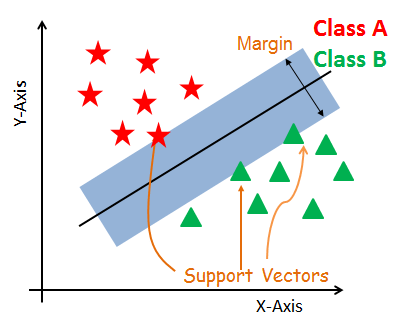



**Import Libraries and dataset**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
cancer['data'].shape

(569, 30)

In [7]:
# creating a dataframe
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


**Data Visualization for better understanding about data**

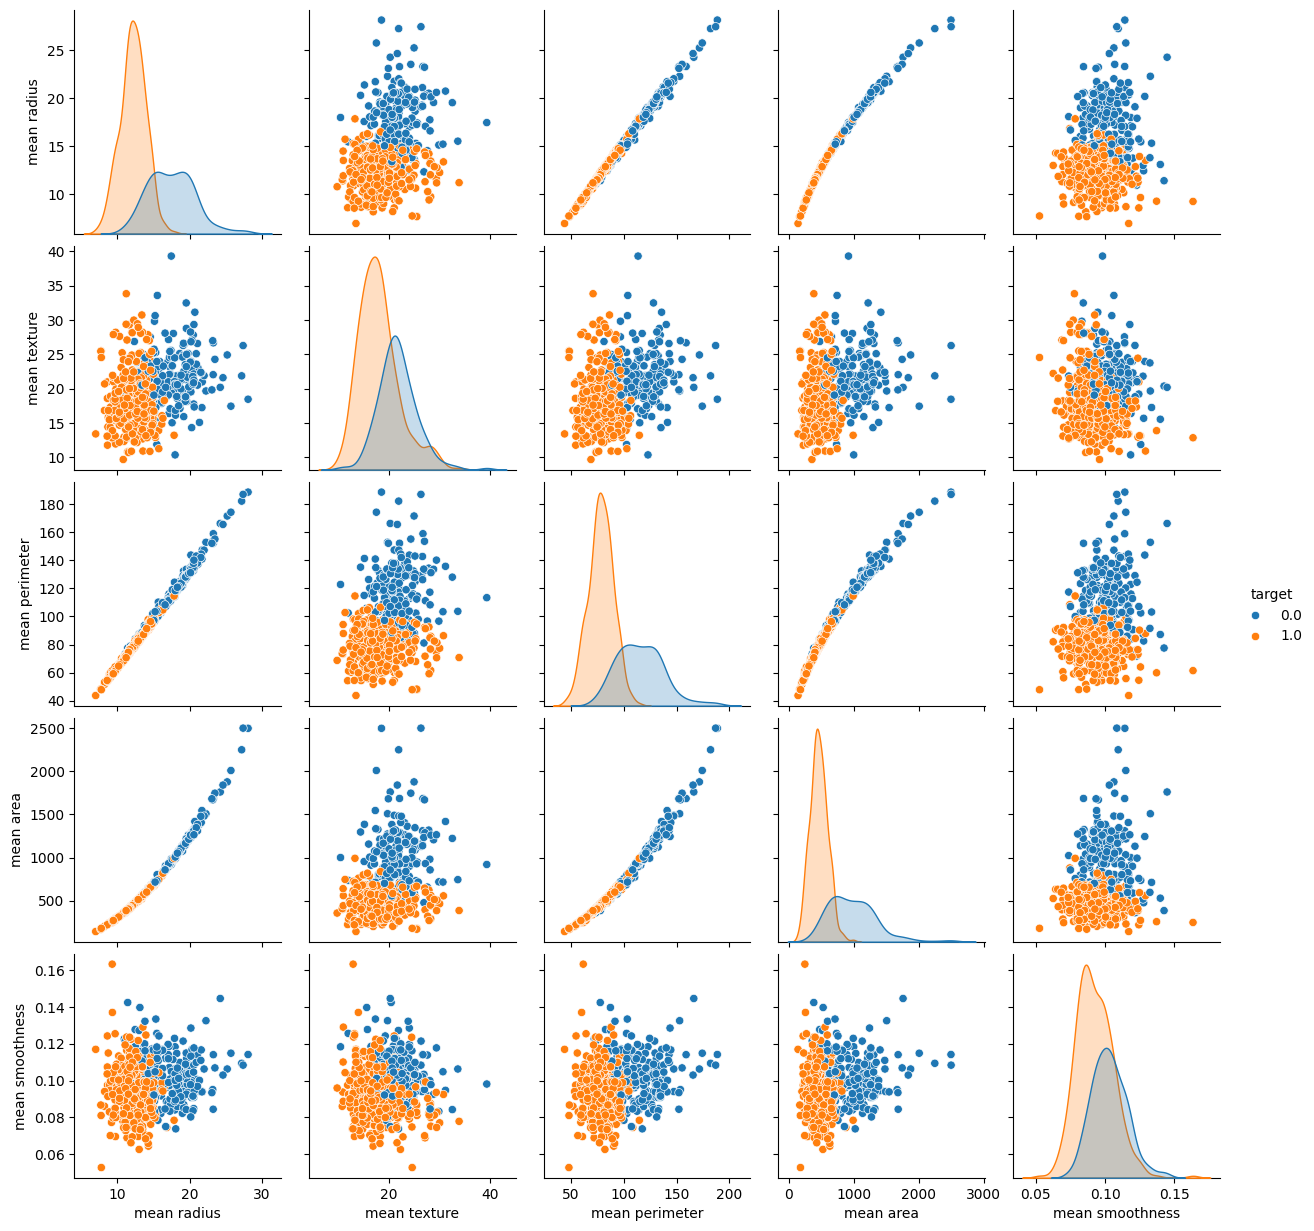

In [9]:
sns.pairplot(df, hue = 'target', vars = ['mean radius',	'mean texture','mean perimeter',	'mean area',	'mean smoothness'])

<Axes: xlabel='mean area', ylabel='mean smoothness'>

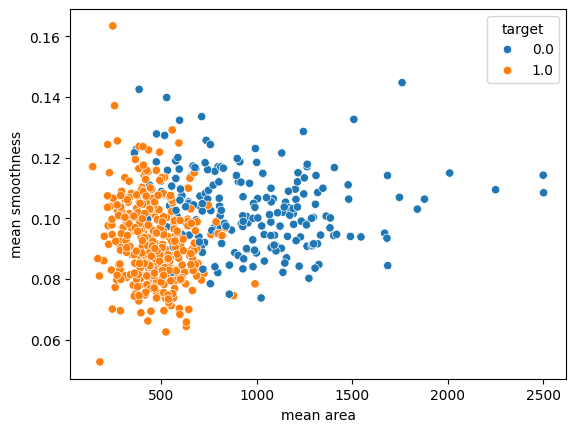

In [10]:
sns.scatterplot(x = 'mean area', y='mean smoothness', hue='target', data=df)

<Axes: >

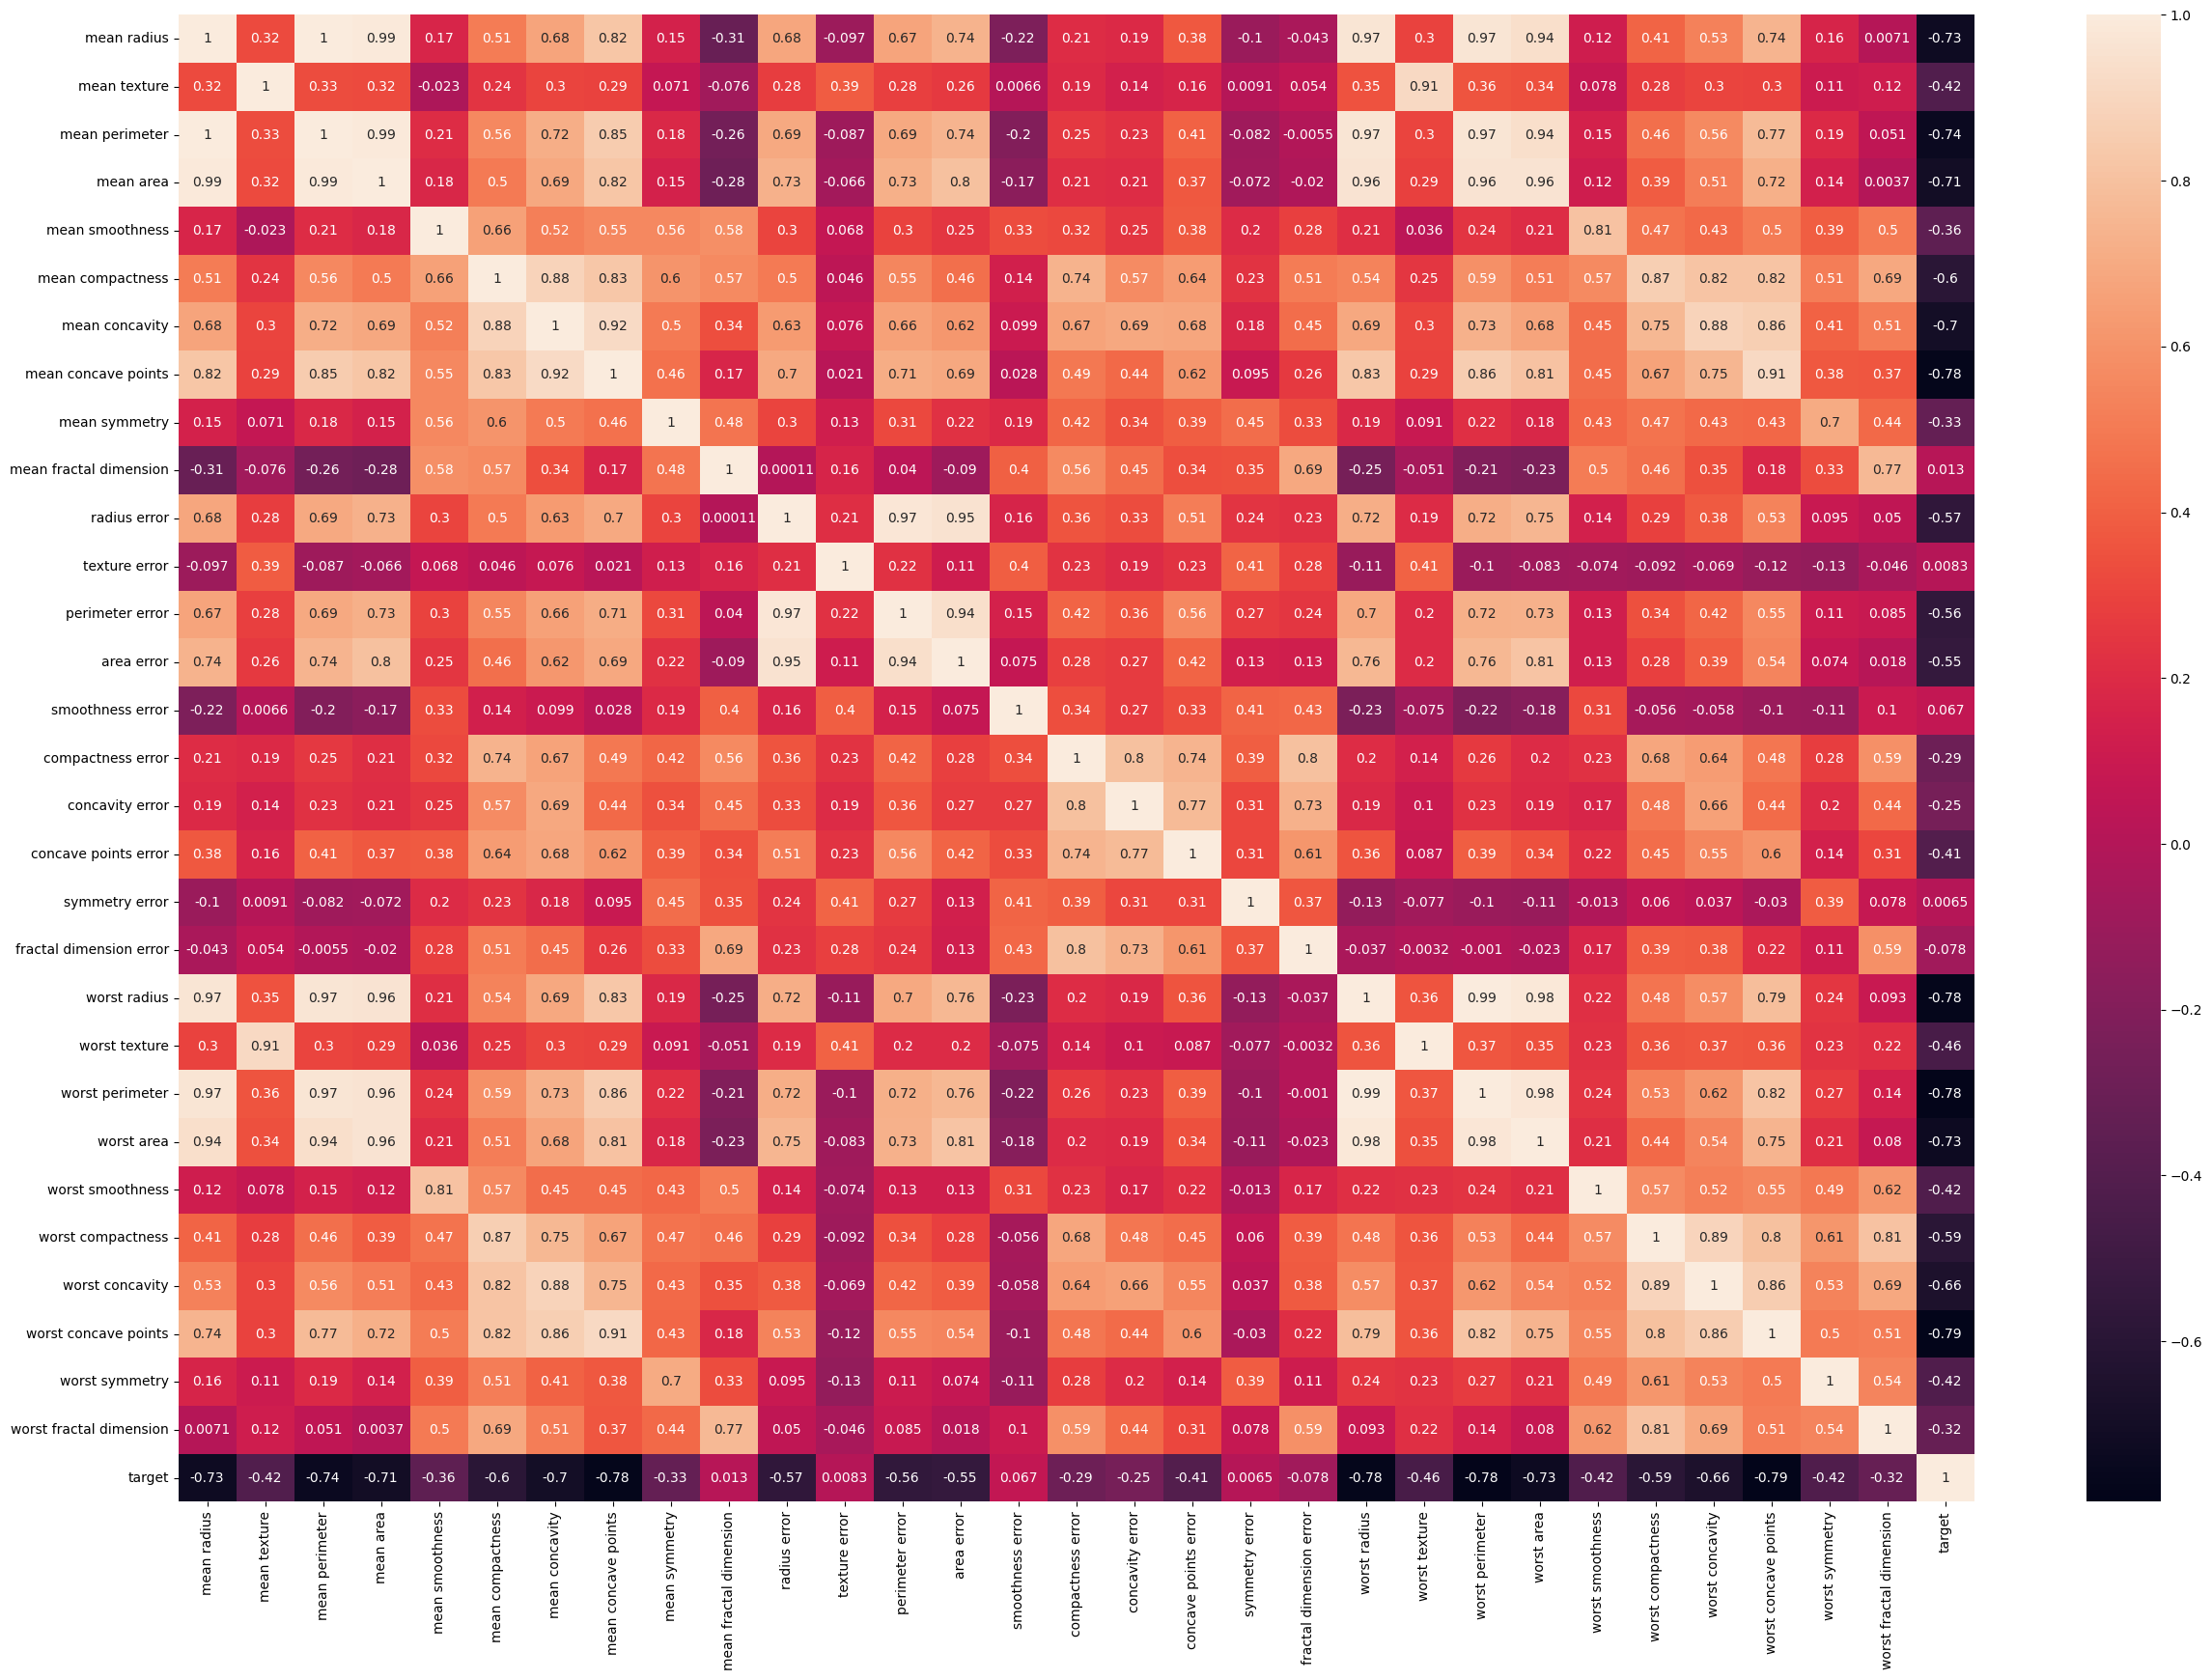

In [11]:
plt.figure(figsize = (30, 20))
sns.heatmap(df.corr(), annot= True)

**Model Training**

In [12]:
x = df.drop(['target'], axis=1)
y = df['target']
print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [14]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

**Evaluate Model**

In [15]:
y_pred = svc_model.predict(x_test)

<Axes: >

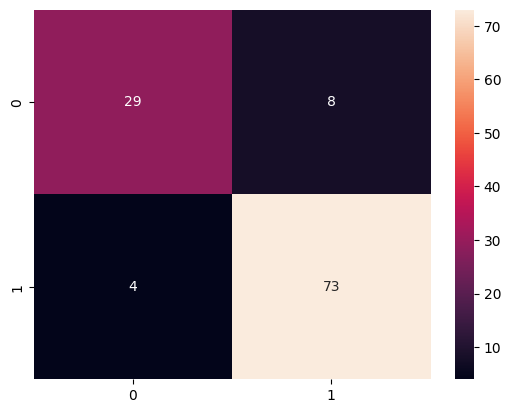

In [16]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

**Improving Model**



*   Apply data Normalization which converts data values into range 0-1.
*   Optimize SVM parameters such as
1. C parameter(controls trade off between classifying training points correctly and having a smooth decision boundary)
2. Gamma parameter(controls how far the influence of a single training set reaches where large gamma indicates closer data poins have high weight and small gamma indicated more generalized solution)



**Data Nomalization**

In [17]:
min_train = x_train.min()
range_train = (x_train - min_train).max()
x_train_scaled = (x_train - min_train) / range_train

<Axes: xlabel='mean area', ylabel='mean smoothness'>

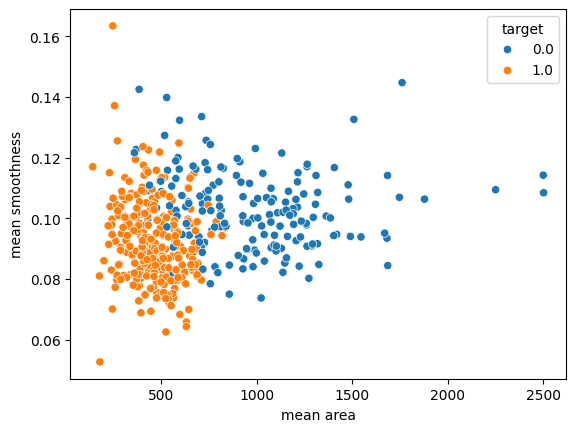

In [18]:
# before scalling
sns.scatterplot(x = x_train['mean area'], y=x_train['mean smoothness'], hue=y_train)

<Axes: xlabel='mean area', ylabel='mean smoothness'>

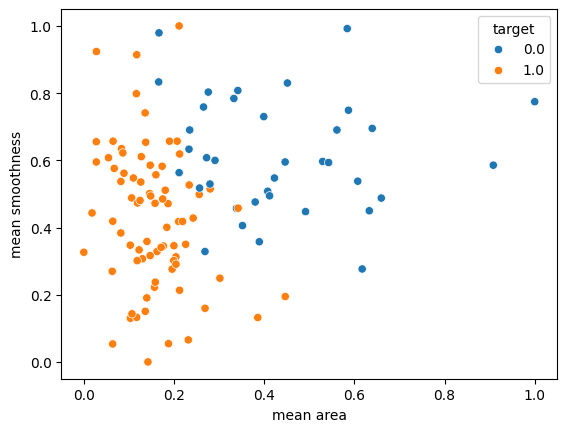

In [19]:
# scalling for test data

min_test = x_test.min()
range_test = (x_test - min_test).max()
x_test_scaled = (x_test - min_test) / range_test

# After Scalling
sns.scatterplot(x = x_test_scaled['mean area'], y=x_test_scaled['mean smoothness'], hue=y_test)

In [20]:
# trainig the model again with scaled data
svc_model.fit(x_train_scaled, y_train)

SVC()

<Axes: >

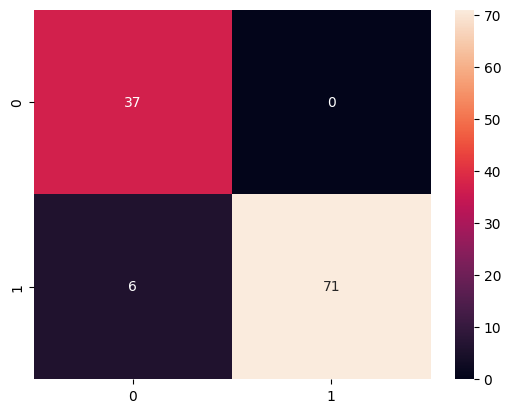

In [21]:
y_pred = svc_model.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        37
         1.0       1.00      0.92      0.96        77

    accuracy                           0.95       114
   macro avg       0.93      0.96      0.94       114
weighted avg       0.95      0.95      0.95       114



**Optimizing SVM parameters**

In [35]:
para_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), para_grid, refit = True, verbose=4)

In [36]:
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.989 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.890 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.890 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.615 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [37]:
# finding best value for each parameters
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

<Axes: >

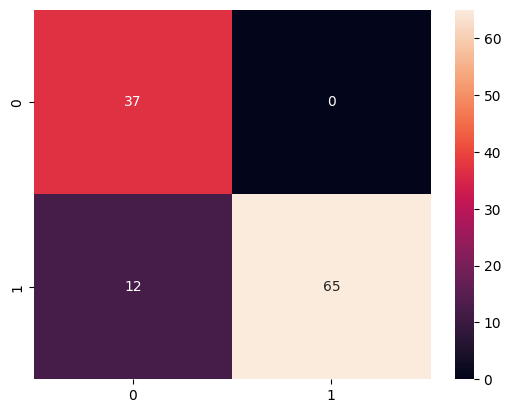

In [38]:
grid_pred = grid.predict(x_test_scaled)
cm = confusion_matrix(y_test, grid_pred)
sns.heatmap(cm, annot=True)

In [39]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86        37
         1.0       1.00      0.84      0.92        77

    accuracy                           0.89       114
   macro avg       0.88      0.92      0.89       114
weighted avg       0.92      0.89      0.90       114

